In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
miami = "../AQI CSV Files/miami_dade.csv"
miami = pd.read_csv(miami, delimiter=", ")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
# Check for null values in miami pm25 dataframe
# miami.isnull().sum() # miami.info()

# drop 13 rows with null values found in pm25
miami_no_nulls = miami.dropna(subset=["pm25"])
miami_rename = miami_no_nulls.rename(columns={"date":"Date","pm25":"PM2.5"})
miami_clean = miami_rename.drop(columns=["pm10","o3","so2","co"])
miami_clean

,Date,PM2.5
0,2020/7/2,52.0
1,2020/7/3,44.0
2,2020/7/4,35.0
3,2020/7/5,50.0
4,2020/7/6,36.0
...,...,...
1388,2014/9/27,37.0
1389,2014/9/28,30.0
1390,2014/9/29,26.0
1391,2014/9/30,31.0


In [4]:
miami_clean[["Year","Month","Day"]] = miami_clean.loc[:,"Date"].str.split("/", n = 2, expand = True) 
miami_clean.drop(columns =["Date"], inplace = True) 
miami_clean

,PM2.5,Year,Month,Day
0,52.0,2020,7,2
1,44.0,2020,7,3
2,35.0,2020,7,4
3,50.0,2020,7,5
4,36.0,2020,7,6
...,...,...,...,...
1388,37.0,2014,9,27
1389,30.0,2014,9,28
1390,26.0,2014,9,29
1391,31.0,2014,9,30


In [5]:
miami_clean["Year"] = miami_clean["Year"].astype(int)
miami_clean["Month"] = miami_clean["Month"].astype(int)
# miami_clean = miami_clean[miami_clean["Year"]>2017]
miami_clean = miami_clean[miami_clean["Month"]<8]
# miami_clean.groupby("Year").count()
miami_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1272
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   817 non-null    float64
 1   Year    817 non-null    int32  
 2   Month   817 non-null    int32  
 3   Day     817 non-null    object 
dtypes: float64(1), int32(2), object(1)
memory usage: 25.5+ KB


In [6]:
miami_reduced = miami_clean[["Year", "Month", "Day", "PM2.5"]]
miami_sorted = miami_reduced.sort_values(by=["Year","Month"], ascending=False)
miami_sorted

,Year,Month,Day,PM2.5
0,2020,7,2,52.0
1,2020,7,3,44.0
2,2020,7,4,35.0
3,2020,7,5,50.0
4,2020,7,6,36.0
...,...,...,...,...
1208,2015,1,27,34.0
1209,2015,1,28,28.0
1210,2015,1,29,35.0
1211,2015,1,30,38.0


In [7]:
AQI = []
for value in miami_sorted["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
miami_sorted["AQI"] = AQI
miami_sorted

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,52.0,141.6
1,2020,7,3,44.0,121.9
2,2020,7,4,35.0,99.2
3,2020,7,5,50.0,136.7
4,2020,7,6,36.0,102.2
...,...,...,...,...,...
1208,2015,1,27,34.0,97.1
1209,2015,1,28,28.0,84.4
1210,2015,1,29,35.0,99.2
1211,2015,1,30,38.0,107.2


In [8]:
# Create bins, cast min and max AQI for preview of bin range
# new_delhi["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
miami_sorted["Levels of Concern"]=pd.cut(miami_sorted["AQI"], bins, labels=quality, include_lowest=True)
miami_bin = miami_sorted
miami_bin

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,52.0,141.6,Unhealthy for Sensitive Groups
1,2020,7,3,44.0,121.9,Unhealthy for Sensitive Groups
2,2020,7,4,35.0,99.2,Moderate
3,2020,7,5,50.0,136.7,Unhealthy for Sensitive Groups
4,2020,7,6,36.0,102.2,Unhealthy for Sensitive Groups
...,...,...,...,...,...,...
1208,2015,1,27,34.0,97.1,Moderate
1209,2015,1,28,28.0,84.4,Moderate
1210,2015,1,29,35.0,99.2,Moderate
1211,2015,1,30,38.0,107.2,Unhealthy for Sensitive Groups


In [9]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
miami_bin["Daily AQI Color"]=pd.cut(miami_bin["AQI"], bins, labels=colors, include_lowest=True)
miami_bins = miami_bin
miami_bins

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,52.0,141.6,Unhealthy for Sensitive Groups,Orange
1,2020,7,3,44.0,121.9,Unhealthy for Sensitive Groups,Orange
2,2020,7,4,35.0,99.2,Moderate,Yellow
3,2020,7,5,50.0,136.7,Unhealthy for Sensitive Groups,Orange
4,2020,7,6,36.0,102.2,Unhealthy for Sensitive Groups,Orange
...,...,...,...,...,...,...,...
1208,2015,1,27,34.0,97.1,Moderate,Yellow
1209,2015,1,28,28.0,84.4,Moderate,Yellow
1210,2015,1,29,35.0,99.2,Moderate,Yellow
1211,2015,1,30,38.0,107.2,Unhealthy for Sensitive Groups,Orange


In [10]:
miami_agg = miami_bins.groupby(["Year","Month"]).agg({"AQI":["mean","min","max"]})
miami_months = miami_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
miami_months

AQI              
                  mean    min    max
Year Month                          
2015 Jan     98.376923   55.0  129.3
     Feb    108.196429   80.2  149.0
     Mar    114.241935   88.6  152.3
     Apr    115.683333   76.0  162.1
     May    112.262069   76.0  166.7
     June   117.863333   76.0  173.4
     Jul    130.522581   86.5  161.1
2016 Jan     92.666667   63.4  126.9
     Feb     96.444828   63.4  124.4
     Mar    111.533333   86.5  154.4
     Apr    106.182759   73.9  134.2
     May    101.348387   78.1  136.7
     June   101.423333   80.2  155.4
     Jul    115.109677   84.4  156.4
2017 Jan    100.540741   80.2  141.6
     Feb    131.800000  119.5  144.1
     May    147.333333  144.1  151.3
2018 Jan     94.412903   59.2  165.2
     Feb     95.700000   71.8  121.9
     Mar    103.183871   80.2  155.4
     Apr     99.679310   78.1  151.3
     May     97.470968   69.7  131.8
     June   108.880000   76.0  151.8
2020 Jan    107.772414   76.0  155.9
     Feb     95.896552   63.4  151.3
     Mar     93.883871   69.7  139.2
     Apr    106.510345   69.7  152.8
     May     92.977419   55.0  134.2
     June    96.006897   61.3  144.1
     Jul    105.592857   63.4  156.4

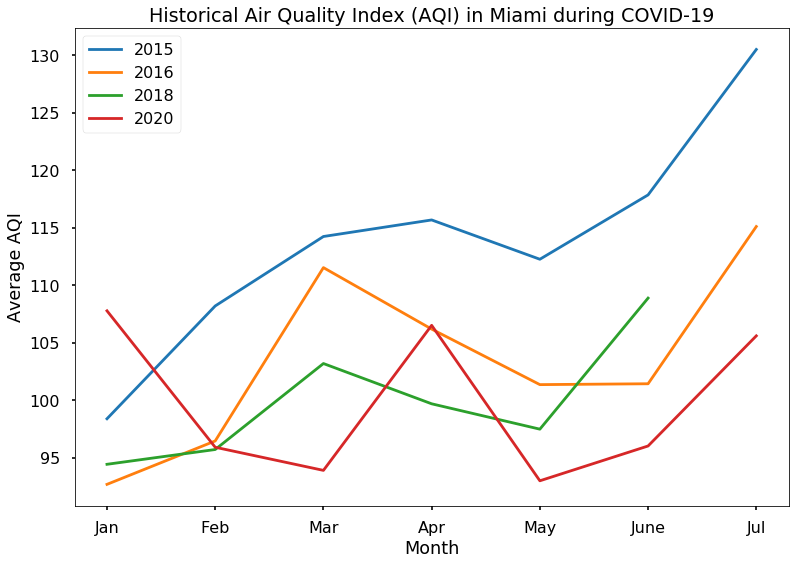

In [11]:
# fig= plt.figure(figsize=(9,7))
plt.style.use('seaborn-poster')
# plt.xkcd()
miami_months["AQI"]["mean"].loc[2015].plot.line(label=2015)
miami_months["AQI"]["mean"].loc[2016].plot.line(label=2016)
miami_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
miami_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Historical Air Quality Index (AQI) in Miami during COVID-19")
plt.ylabel("Average AQI")
plt.legend()
plt.show()

In [13]:
# miami_agg["AQI"]["mean"].loc[2015]